In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("Credit Card Dataset.csv")

In [4]:
df2 = pd.read_csv("application_record.csv")

In [5]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df1.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [8]:
df2.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [9]:
# cleaning the second dataset
df2['OCCUPATION_TYPE'].fillna('Other', inplace=True)

/var/folders/kz/pzq5xgxj58bb6nqgtmckp_x00000gn/T/ipykernel_24092/3038720268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['OCCUPATION_TYPE'].fillna('Other', inplace=True)


In [10]:
df2.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [11]:
# adding column for age to df2 using DAYS_BIRTH
df2['AGE'] = (-df2['DAYS_BIRTH'] // 365)
df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52


In [12]:
common_ids = set(df1['ID']).intersection(set(df2['ID']))
print(f"Number of common IDs: {len(common_ids)}")

Number of common IDs: 36457


In [13]:
# creating new dataset with common ID and their respective data
df = df1[df1['ID'].isin(common_ids)].merge(df2[df2['ID'].isin(common_ids)], on='ID', how='inner')
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,32


In [14]:
# creating a separate column for ratio of X status per ID to the total number of payments made by the ID
ratio_df = df.groupby('ID')['STATUS'].agg(lambda x: x[x == 'X'].count() / len(x)).rename('X_Ratio')

# Merge the ratio back to the original DataFrame
df = df.merge(ratio_df, on='ID', how='left')

In [15]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.0625
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.0625
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.0625
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.0625
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.0625


In [16]:
df.head(100)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.062500
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.062500
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.062500
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.062500
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Other,2.0,32,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,-24,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,0.222222
96,5008810,-25,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,0.222222
97,5008810,-26,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,0.222222
98,5008811,0,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,0.153846


In [17]:
# adding an empty output column to the dataset called fraud to be filled with 1 or 0
df['FRAUD'] = np.nan

In [18]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio,FRAUD
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN


In [19]:
# separating the data into 2 dataframes, ratio > 0.4 and ratio < 0.4

df_lower = df[df['X_Ratio'] > 0.4]
df_higher = df[df['X_Ratio'] < 0.4]

df_lower.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio,FRAUD
31,5008806,0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-1134,1,0,0,0,Security staff,2.0,58,0.533333,NaN
32,5008806,-1,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-1134,1,0,0,0,Security staff,2.0,58,0.533333,NaN
33,5008806,-2,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-1134,1,0,0,0,Security staff,2.0,58,0.533333,NaN
34,5008806,-3,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-1134,1,0,0,0,Security staff,2.0,58,0.533333,NaN
35,5008806,-4,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-1134,1,0,0,0,Security staff,2.0,58,0.533333,NaN


In [20]:
df_higher.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio,FRAUD
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,Other,2.0,32,0.0625,NaN


In [21]:
# list of columns
df.columns


Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'X_Ratio', 'FRAUD'],
      dtype='object')

In [22]:
# Compute raw credit score
df['CREDIT_SCORE_RAW'] = ((df['AMT_INCOME_TOTAL'] - df['DAYS_EMPLOYED']) * 0.95) + (df['AGE'] * 0.95)

# Scale to 100–900
min_score = df['CREDIT_SCORE_RAW'].min()
max_score = df['CREDIT_SCORE_RAW'].max()

df['CREDIT_SCORE'] = 100 + (df['CREDIT_SCORE_RAW'] - min_score) * (900 - 100) / (max_score - min_score)


In [23]:
df['CREDIT_SCORE'].mean()

# fixing credit score and making it more accurate using mean
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())


In [24]:
# assigning fraud status on basis of X_Ratio_x

df.loc[df['X_Ratio'] > 0.4, 'FRAUD'] = 1
df.loc[df['X_Ratio'] < 0.4, 'FRAUD'] = 0

df.head()


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,X_Ratio,FRAUD,CREDIT_SCORE_RAW,CREDIT_SCORE
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,1,0,0,Other,2.0,32,0.0625,0.0,410470.3,421.101428
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,1,0,0,Other,2.0,32,0.0625,0.0,410470.3,421.101428
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,1,0,0,Other,2.0,32,0.0625,0.0,410470.3,421.101428
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,1,0,0,Other,2.0,32,0.0625,0.0,410470.3,421.101428
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,1,0,0,Other,2.0,32,0.0625,0.0,410470.3,421.101428


In [25]:
# creating a dataset with the unique ID, Income, Credit Score, X ratio and Fraud Status
df_final = df[['ID', 'AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'CREDIT_SCORE', 'X_Ratio', 'FRAUD', 'AGE']].drop_duplicates()


In [26]:
df_final.head()

,ID,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,OCCUPATION_TYPE,CREDIT_SCORE,X_Ratio,FRAUD,AGE
0,5008804,427500.0,Working,Other,421.101428,0.062500,0.0,32
16,5008805,427500.0,Working,Other,421.101428,0.066667,0.0,32
31,5008806,112500.0,Working,Security staff,287.987733,0.533333,1.0,58
61,5008808,270000.0,Commercial associate,Sales staff,354.636561,0.600000,1.0,52
66,5008809,270000.0,Commercial associate,Sales staff,354.636561,1.000000,1.0,52


In [27]:
# extra chack - if ratio below 0.4, check the Income, if Income is below 20000, assign fraud 1 else if income high, check credit score, if credit score is below 420, assign fraud 1
df_final.loc[(df_final['X_Ratio'] < 0.4) & (df_final['AMT_INCOME_TOTAL'] < 20000), 'FRAUD'] = 1
df_final.loc[(df_final['X_Ratio'] < 0.4) & (df_final['AMT_INCOME_TOTAL'] > 20000) & (df_final['CREDIT_SCORE'] < 300), 'FRAUD'] = 1

In [28]:
# choose 5 random entries
df_final.sample(5)


,ID,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,OCCUPATION_TYPE,CREDIT_SCORE,X_Ratio,FRAUD,AGE
207945,5045969,90000.0,Working,Laborers,278.531695,0.000000,1.0,24
619893,5117669,112500.0,Working,Sales staff,287.911640,0.000000,1.0,31
746327,5148442,202500.0,Commercial associate,Core staff,325.298885,0.000000,0.0,23
671377,5135271,216000.0,Pensioner,Other,178.082452,0.142857,1.0,63
49556,5021801,225000.0,Commercial associate,Core staff,334.616952,0.333333,0.0,33


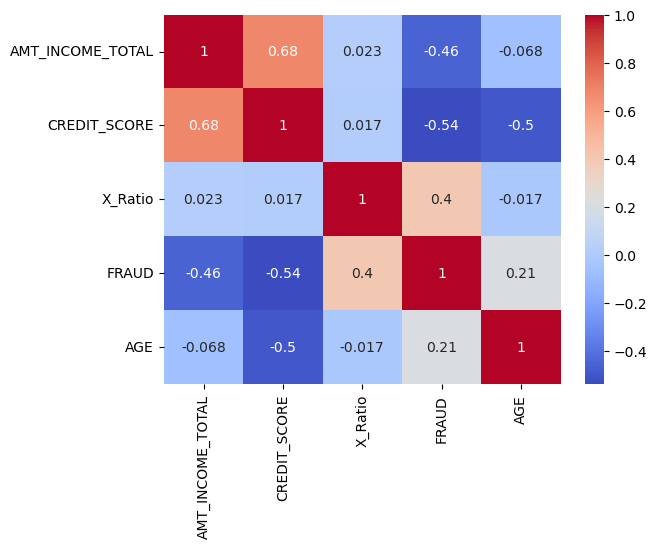

In [29]:
# choosing Fraud as our target variable and choosing other numerical columns as our predictor variables
X = df_final[['AMT_INCOME_TOTAL', 'CREDIT_SCORE', 'X_Ratio', 'AGE']]
y = df_final['FRAUD']

# correlation matrix
corr = df_final[['AMT_INCOME_TOTAL', 'CREDIT_SCORE', 'X_Ratio', 'FRAUD', 'AGE']].corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [40]:
# Analyse fraud patterns and applicant characteristics

# plot the pairplot
# sns.pairplot(df_final[['AMT_INCOME_TOTAL', 'CREDIT_SCORE', 'X_Ratio', 'FRAUD', 'AGE']])
# plt.show()

# plot the boxplot
# sns.boxplot(x='FRAUD', y='AMT_INCOME_TOTAL', data=df_final)
# plt.show()

# making sure that no fraud column value is null
df_final['FRAUD'].isnull().sum()

# filling NULL values from fraud column
df_final['FRAUD'] = df_final['FRAUD'].fillna(0)


Missing values detected in y. Handling them...
Logistic Regression Accuracy: 0.9122081264938408
[[4174  418]
 [ 537 5749]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4592
         1.0       0.93      0.91      0.92      6286

    accuracy                           0.91     10878
   macro avg       0.91      0.91      0.91     10878
weighted avg       0.91      0.91      0.91     10878

Random Forest Accuracy: 1.0
[[4592    0]
 [   0 6286]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4592
         1.0       1.00      1.00      1.00      6286

    accuracy                           1.00     10878
   macro avg       1.00      1.00      1.00     10878
weighted avg       1.00      1.00      1.00     10878

Gradient Boosting Accuracy: 1.0
[[4592    0]
 [   0 6286]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4592


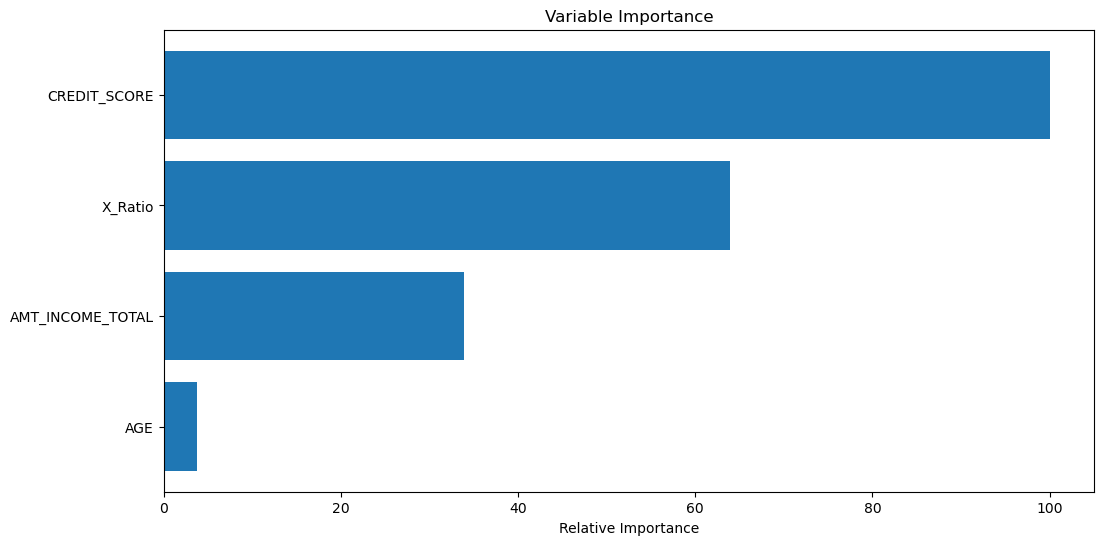

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Handle missing values in y (if any)
if np.any(np.isnan(y)):
    print("Missing values detected in y. Handling them...")
    mask = ~np.isnan(y)  # Mask to exclude rows with NaN in y
    X = X[mask]
    y = y[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance - Random Forest
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Assuming X is a pandas DataFrame, otherwise update to use feature names
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


Logistic Regression:
F1 Score: 0.9233116518108087
Precision: 0.9322198800064861
Recall: 0.9145720649061406
Accuracy: 0.9122081264938408


Random Forest:
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


Gradient Boosting:
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0




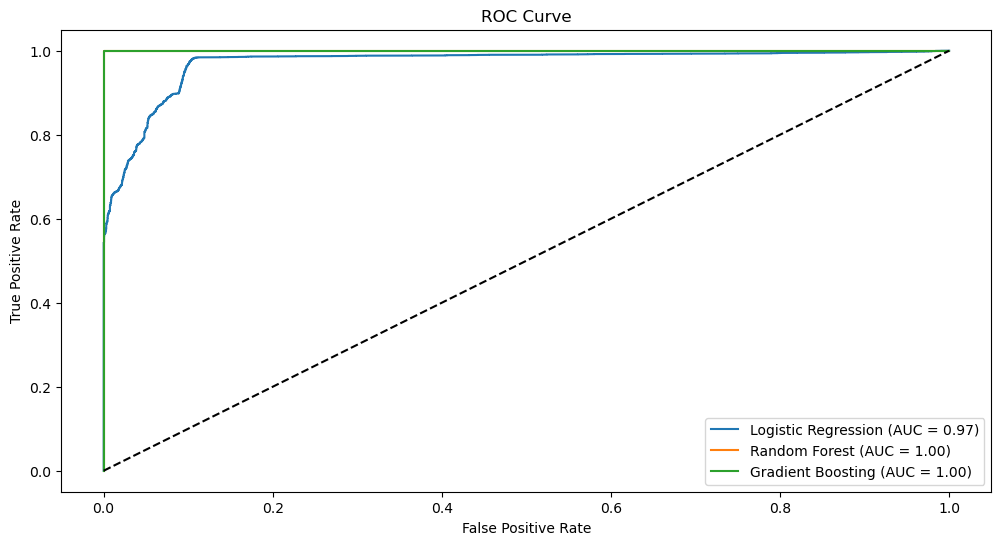

In [46]:
# printing f1 score precision accuracy recall for all models
from sklearn.metrics import f1_score, precision_score, recall_score

models = [log_reg, rf, gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print("\n")

# plotting AUC-ROC curve for all models
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(12, 6))

for model, name in zip(models, model_names):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()



In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Assume df_final is your DataFrame and 'CREDIT_SCORE' is the target
features = ['AMT_INCOME_TOTAL', 'X_Ratio', 'AGE']
target = 'CREDIT_SCORE'

# Drop rows with missing values in features or target
df_final = df_final.dropna(subset=features + [target])

X = df_final[features].values.astype(np.float32)
y = df_final[target].values.astype(np.float32)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch datasets
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

# Simple regression MLP
class CreditScoreMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.net(x)

model = CreditScoreMLP(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with tqdm
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for xb, yb in progress:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        progress.set_postfix(loss=loss.item())
    print(f"Epoch {epoch+1}, Avg Train Loss: {running_loss/len(train_loader):.4f}")

# Testing loop with tqdm
model.eval()
preds_list = []
labels_list = []
test_progress = tqdm(test_loader, desc="Testing")
with torch.no_grad():
    for xb, yb in test_progress:
        preds = model(xb)
        preds_list.extend(preds.squeeze().cpu().tolist())
        labels_list.extend(yb.squeeze().cpu().tolist())
mse = mean_squared_error(labels_list, preds_list)
r2 = r2_score(labels_list, preds_list)
print(f"Test MSE: {mse:.4f} | Test R2: {r2:.4f}")

NameError: name 'df_final' is not defined